# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy import stats

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


In [2]:
## Task 1
avg_price_coach = np.mean(flight["coach_price"])
median_price_coach = np.median(flight["coach_price"])
max_price_coach = np.max(flight["coach_price"])
min_price_coach = np.min(flight["coach_price"])

print("The average price for a ticket in coach is:", round(avg_price_coach, 2), "$.")
print("The median price for a ticket in coach is:", round(median_price_coach, 2), "$.")
print("The maximum price for a ticket in coach is:", round(max_price_coach, 2), "$.")
print("The minimum price for a ticket in coach is:", round(min_price_coach, 2), "$.")

The average price for a ticket in coach is: 376.59 $.
The median price for a ticket in coach is: 380.56 $.
The maximum price for a ticket in coach is: 593.63 $.
The minimum price for a ticket in coach is: 44.41 $.


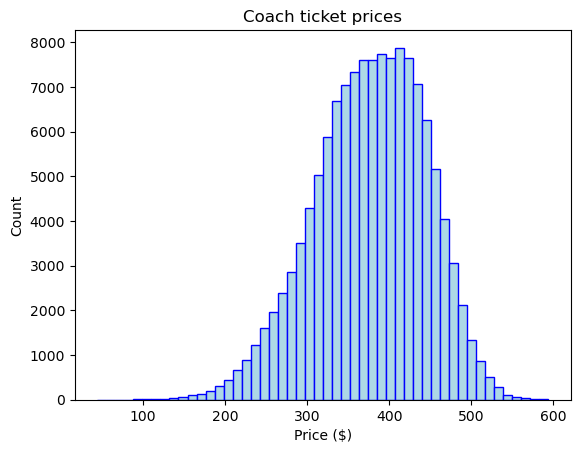

<Figure size 640x480 with 0 Axes>

In [88]:
plt.hist(flight["coach_price"], bins = 50, color = "lightblue", edgecolor = "blue")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Coach ticket prices")
plt.show()
plt.clf()

**Answer:** _Coach tickets prices are around 400`$`, so 500`$` for a ticket is a bit of limits for this type of tickets._

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [4]:
## Task 2
avg_price_coach_8h = np.mean(flight["coach_price"][flight["hours"] == 8])
median_price_coach_8h = np.median(flight["coach_price"][flight["hours"] == 8])
max_price_coach_8h = np.max(flight["coach_price"][flight["hours"] == 8])
min_price_coach_8h = np.min(flight["coach_price"][flight["hours"] == 8])

print("The average price for a ticket in coach for an 8 hour flight is:", round(avg_price_coach_8h, 2), "$.")
print("The median price for a ticket in coach for an 8 hour flight is:", round(median_price_coach_8h, 2), "$.")
print("The maximum price for a ticket in coach for an 8 hour flight is:", round(max_price_coach_8h, 2), "$.")
print("The minimum price for a ticket in coach for an 8 hour flight is:", round(min_price_coach_8h, 2), "$.")

The average price for a ticket in coach for an 8 hour flight is: 431.83 $.
The median price for a ticket in coach for an 8 hour flight is: 437.12 $.
The maximum price for a ticket in coach for an 8 hour flight is: 593.63 $.
The minimum price for a ticket in coach for an 8 hour flight is: 170.77 $.


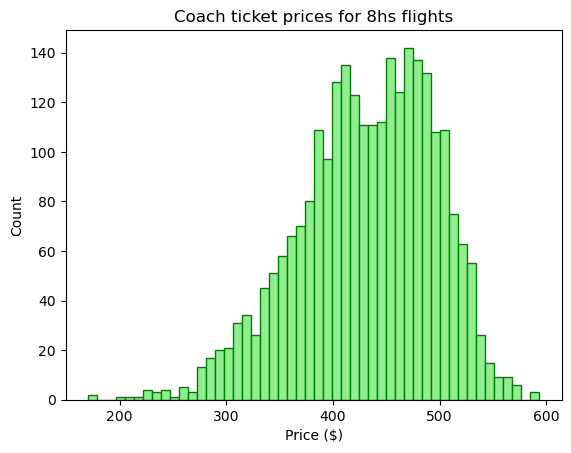

<Figure size 640x480 with 0 Axes>

In [89]:
plt.hist(flight["coach_price"][flight["hours"] == 8], bins = 50, color = "lightgreen", edgecolor = "green")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Coach ticket prices for 8hs flights")
plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [6]:
flight["delay"].describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

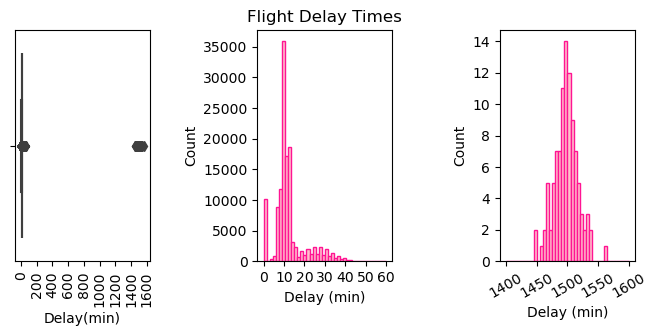

<Figure size 640x480 with 0 Axes>

In [90]:
## Task 3
plt.figure(figsize = (8,3))
plt.subplot(1,3,1)
sns.boxplot(x = "delay", data = flight)
plt.xticks(range(0, 1601, 200), rotation = 90)
plt.xlabel("Delay(min)")

plt.subplot(1,3,2)
plt.hist(flight.delay, range = (0, 60), bins = 40, color = "pink", edgecolor = "deeppink")
plt.xlabel("Delay (min)")
plt.ylabel("Count")
plt.xticks(range(0, 61, 10))
plt.title("Flight Delay Times")

plt.subplot(1,3,3)
plt.hist(flight.delay, range = (1400, 1600), bins = 40, color = "pink", edgecolor = "deeppink")
plt.xticks(range(1400, 1601, 50), rotation = 30)
plt.xlabel("Delay (min)")
plt.ylabel("Count")

plt.subplots_adjust(wspace = 0.8)
plt.show()
plt.clf()

**Answer:** _The most common delays are between 0 and 50 minutes, being the most usual around 13 minutes (counts higher than 35000). There are some outliers with higher delays from 23 hours to 26 hours, but with low counts (max 14)_

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [8]:
x = flight["coach_price"]
y = flight["firstclass_price"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

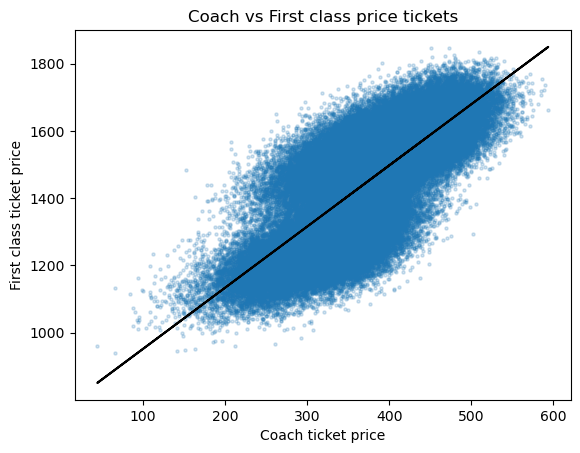

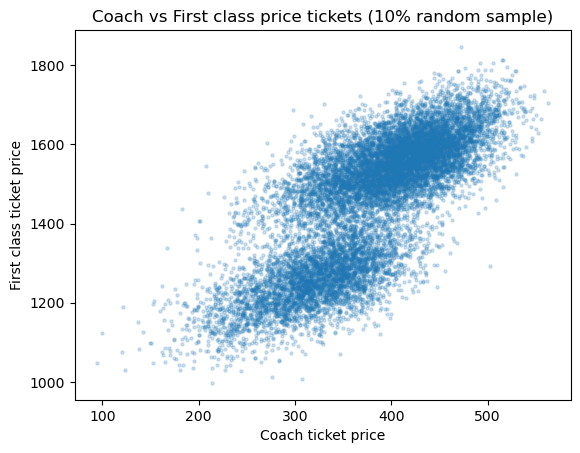

<Figure size 640x480 with 0 Axes>

In [91]:
## Task 4

plt.scatter(flight["coach_price"], flight["firstclass_price"], alpha = 0.2, s = 5)
plt.plot(x, mymodel, color = "black")
plt.xlabel("Coach ticket price")
plt.ylabel("First class ticket price")
plt.title("Coach vs First class price tickets")
plt.show()
plt.clf()

#Take a random subset of data (10%) to improve visualization
flight_sub = flight.sample(n = int(flight.shape[0]*0.1))
plt.scatter(flight_sub["coach_price"], flight_sub["firstclass_price"], alpha = 0.2, s = 5)
plt.xlabel("Coach ticket price")
plt.ylabel("First class ticket price")
plt.title("Coach vs First class price tickets (10% random sample)")
plt.show()
plt.clf()

**Answer:** _There is a linear relationship between ticket prices, flights with more expensive coach tickets also have more expensive first class tickets._

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

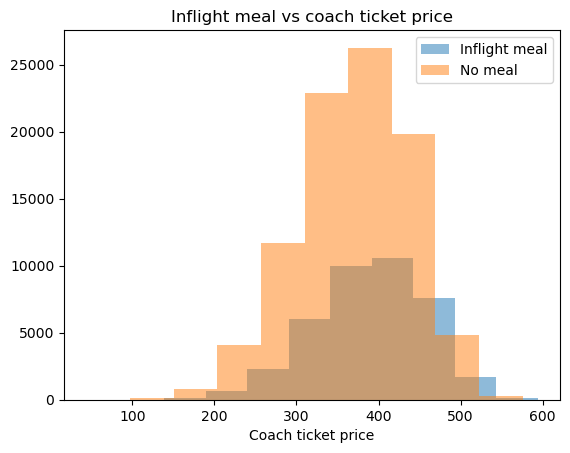

<Figure size 640x480 with 0 Axes>

In [69]:
## Task 5
plt.hist(flight.coach_price[flight["inflight_meal"]=="Yes"], label = "Inflight meal", alpha = 0.5)
plt.hist(flight.coach_price[flight["inflight_meal"]=="No"], label = "No meal", alpha = 0.5)
plt.xlabel("Coach ticket price")
plt.title("Inflight meal vs coach ticket price")
plt.legend()
plt.show()
plt.clf()

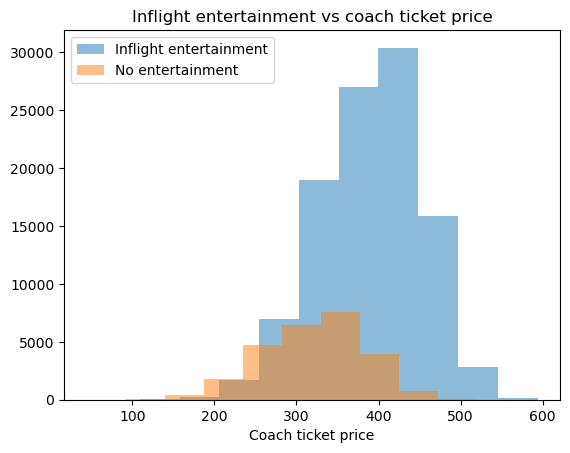

<Figure size 640x480 with 0 Axes>

In [71]:
plt.hist(flight.coach_price[flight["inflight_entertainment"]=="Yes"], label = "Inflight entertainment", alpha = 0.5)
plt.hist(flight.coach_price[flight["inflight_entertainment"]=="No"], label = "No entertainment", alpha = 0.5)
plt.xlabel("Coach ticket price")
plt.title("Inflight entertainment vs coach ticket price")
plt.legend()
plt.show()
plt.clf()

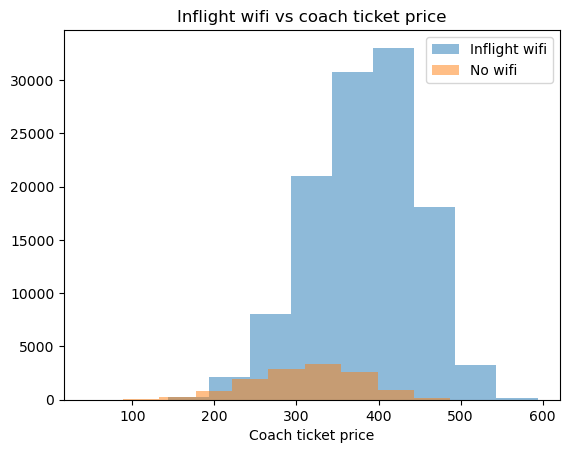

<Figure size 640x480 with 0 Axes>

In [72]:
plt.hist(flight.coach_price[flight["inflight_wifi"]=="Yes"], label = "Inflight wifi", alpha = 0.5)
plt.hist(flight.coach_price[flight["inflight_wifi"]=="No"], label = "No wifi", alpha = 0.5)
plt.xlabel("Coach ticket price")
plt.title("Inflight wifi vs coach ticket price")
plt.legend()
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

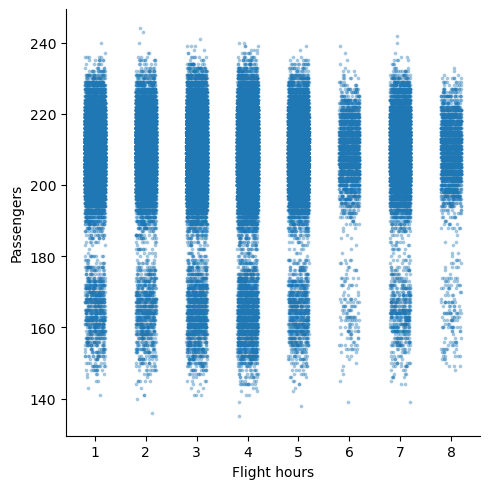

<Figure size 640x480 with 0 Axes>

In [74]:
## Task 6
sns.lmplot(x= "hours", y="passengers", data = flight, x_jitter = 0.2, scatter_kws={"s": 3, "alpha":0.3}, fit_reg = False)
plt.xlabel("Flight hours")
plt.ylabel("Passengers")
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

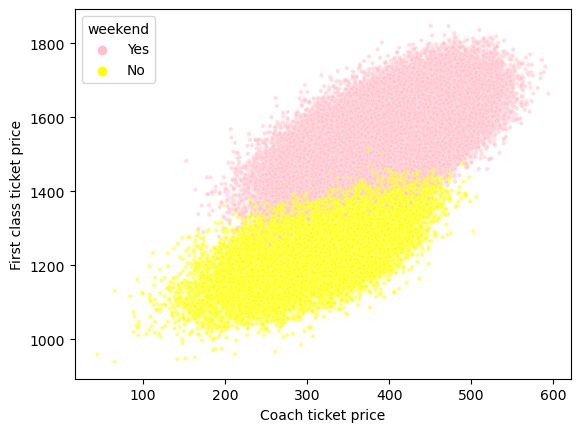

<Figure size 640x480 with 0 Axes>

In [100]:
## Task 7
pal = {"Yes":"pink", "No": "yellow"}
sns.scatterplot(x= "coach_price", y= "firstclass_price", data = flight, hue= "weekend", palette = pal, s=10, alpha = 0.5)
plt.xlabel("Coach ticket price")
plt.ylabel("First class ticket price")
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

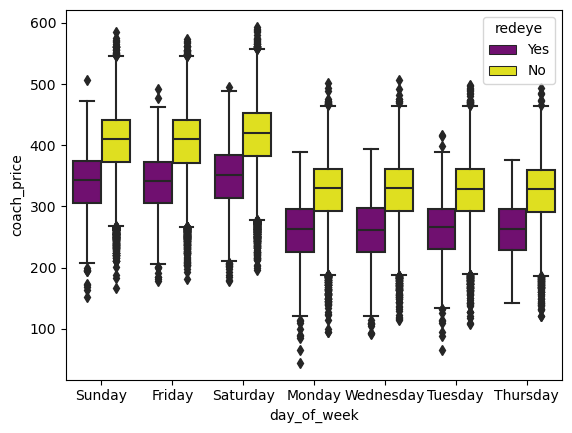

<Figure size 640x480 with 0 Axes>

In [87]:
## Task 8
pal = {"Yes":"purple", "No": "yellow"}
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", palette = pal, data = flight)
plt.show()
plt.clf()